# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the file
df=pd.read_csv("hotstar.csv")

In [3]:
#First 5 Records in a data.
df.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,NaN,NaN,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,NaN,NaN,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,NaN,NaN,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,NaN,NaN,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,NaN,NaN,movie


In [4]:
df.shape
#There are total 6359 Rows and 10 Columns

(6359, 10)

# Movie Type that are listed on Hotstar

In [5]:
g=df.groupby("type")

In [6]:
movie_shows=g.get_group("movie")

In [7]:
movie_shows
#There are total 4188 movies listed on hotstar

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,NaN,NaN,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,NaN,NaN,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,NaN,NaN,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,NaN,NaN,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,NaN,NaN,movie
...,...,...,...,...,...,...,...,...,...,...
4183,1000104370,Achan Kompathu Amma Varampathu,"When their children abandon them, life for Mur...",Drama,1995,U/A 7+,154.0,NaN,NaN,movie
4184,1000058491,Maan Karate,A seer meets a few IT employees and predicts t...,Comedy,2014,U,143.0,NaN,NaN,movie
4185,1000108138,My Dear Kuttichathan,"A black magician enslaves a spirit but soon, a...",Kids,1984,U/A 7+,95.0,NaN,NaN,movie
4186,1260048639,folklore: the long pond studio sessions,An intimate musical concert featuring Taylor S...,Documentary,2020,U/A 16+,106.0,NaN,NaN,movie


In [8]:
#Finding Null value
movie_shows.isnull().sum()/len(movie_shows)*100

hotstar_id        0.0
title             0.0
description       0.0
genre             0.0
year              0.0
age_rating        0.0
running_time      0.0
seasons         100.0
episodes        100.0
type              0.0
dtype: float64

In [9]:
#Droping the Column which has more than 50% of null value
movie_shows.drop(["seasons","episodes"],axis=1,inplace=True)

In [10]:
movie_shows

,hotstar_id,title,description,genre,year,age_rating,running_time,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,movie
...,...,...,...,...,...,...,...,...
4183,1000104370,Achan Kompathu Amma Varampathu,"When their children abandon them, life for Mur...",Drama,1995,U/A 7+,154.0,movie
4184,1000058491,Maan Karate,A seer meets a few IT employees and predicts t...,Comedy,2014,U,143.0,movie
4185,1000108138,My Dear Kuttichathan,"A black magician enslaves a spirit but soon, a...",Kids,1984,U/A 7+,95.0,movie
4186,1260048639,folklore: the long pond studio sessions,An intimate musical concert featuring Taylor S...,Documentary,2020,U/A 16+,106.0,movie


In [11]:
#Finding the unique age_rating
movie_shows.age_rating.unique()

array(['U/A 13+', 'U', 'U/A 7+', 'U/A 16+', 'A'], dtype=object)

# Cleaning age_rating column 

In [12]:
movie_shows["age_rating"]=movie_shows["age_rating"].str.replace("+","")

In [13]:
movie_shows.age_rating.unique()

array(['U/A 13', 'U', 'U/A 7', 'U/A 16', 'A'], dtype=object)

In [14]:
movie_shows["age_rating"]=movie_shows["age_rating"].str.replace("U/A","")

In [15]:
movie_shows.age_rating.unique()

array([' 13', 'U', ' 7', ' 16', 'A'], dtype=object)

In [16]:
movie_shows["age_rating"]=movie_shows["age_rating"].str.replace("U","4")

In [17]:
movie_shows["age_rating"]=movie_shows["age_rating"].str.replace("A","18")

In [18]:
#Converting object datatype into integer
movie_shows["age_rating"]=movie_shows["age_rating"].astype("int")

In [19]:
movie_shows.age_rating.unique()

array([13,  4,  7, 16, 18])

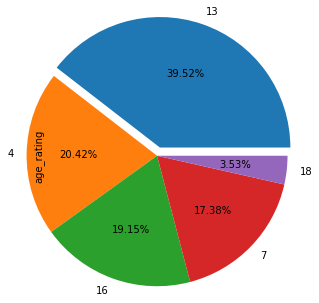

In [20]:
movie_shows["age_rating"].value_counts().plot.pie(autopct="%1.2f%%",explode=[0.1,0,0,0,0],radius=1.5)
plt.show()

From the pie chart we can conclude that there are 39.52% of movie are listed for age group of 13.
And only 3.53% of movie are listed for Adult, i.e for age group above 18.

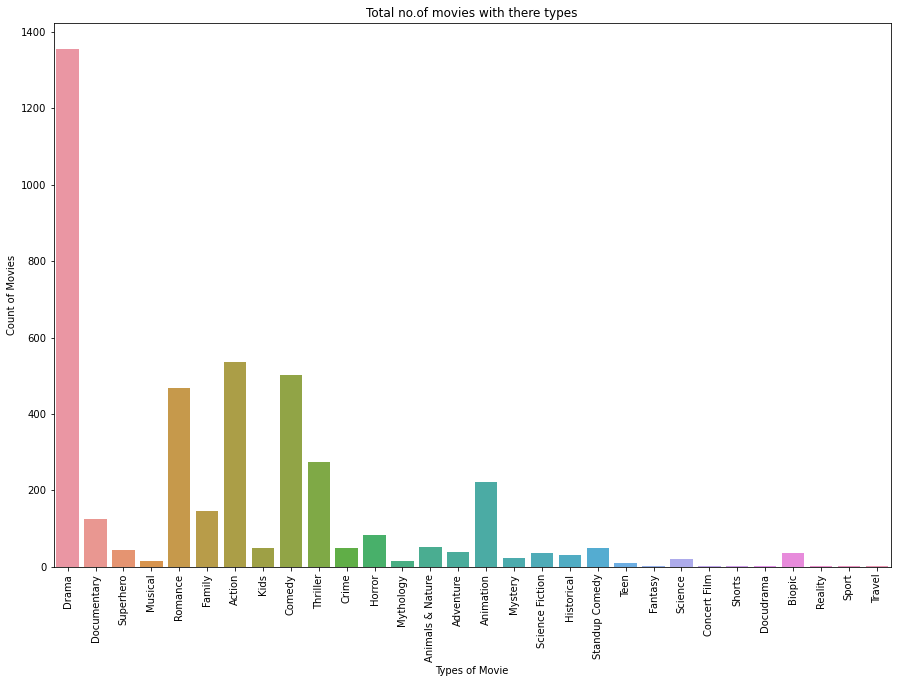

TOP 10 MOVIE TYPE LISTED ON HOTSTAR
 Drama               1355
Action               535
Comedy               503
Romance              467
Thriller             274
Animation            221
Family               147
Documentary          124
Horror                82
Animals & Nature      53
Name: genre, dtype: int64


In [21]:
plt.figure(figsize=(15,10))
sns.countplot("genre",data=movie_shows)
plt.xlabel("Types of Movie")
plt.ylabel("Count of Movies")
plt.title("Total no.of movies with there types")
plt.xticks(rotation=90)
plt.show()

print("TOP 10 MOVIE TYPE LISTED ON HOTSTAR\n",movie_shows["genre"].value_counts().nlargest(10))

# Movie type age wise

In [22]:
age=movie_shows.groupby("age_rating")

In [23]:
movie_shows.age_rating.unique()

array([13,  4,  7, 16, 18])

In [24]:
age_4=age.get_group(4)

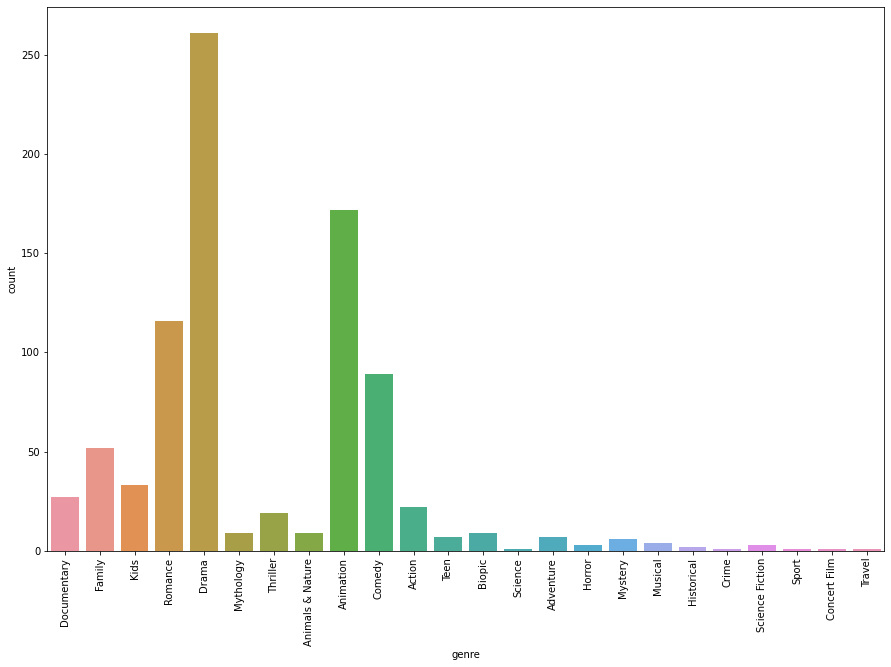

For age group of 4 there are total 855 Movie listed on hotstar.

Top 5 Category are
 Drama        261
Animation    172
Romance      116
Comedy        89
Family        52
Name: genre, dtype: int64


In [25]:
plt.figure(figsize=(15,10))
sns.countplot(age_4["genre"])
plt.xticks(rotation=90)
plt.show()

print("For age group of 4 there are total",age_4["genre"].count(),"Movie listed on hotstar.\n")
print("Top 5 Category are\n",age_4["genre"].value_counts().nlargest(5))

In [26]:
age_7=age.get_group(7)

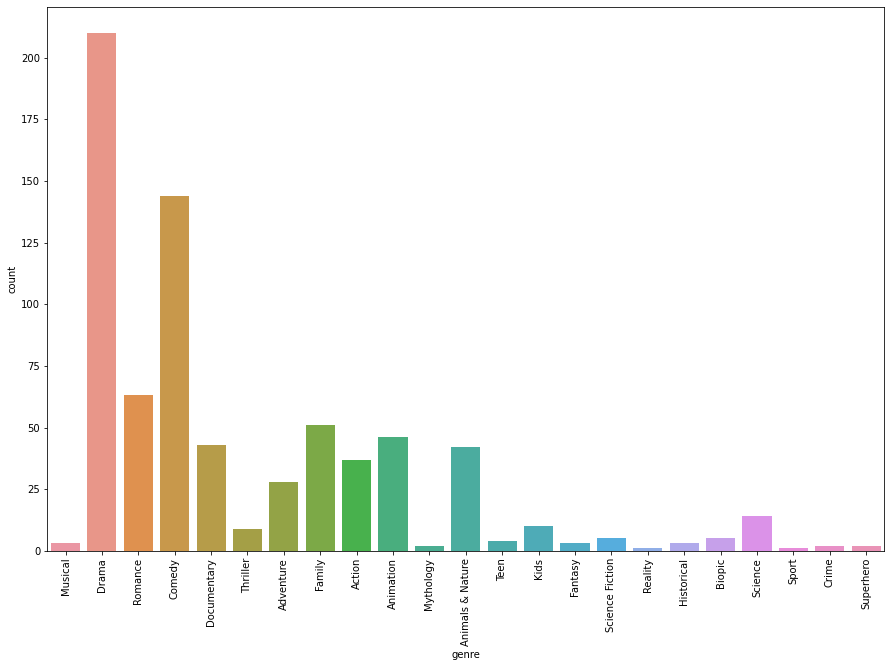

For age group of 7 there are total 728 Movie listed on hotstar.

Top 5 Category are
 Drama        210
Comedy       144
Romance       63
Family        51
Animation     46
Name: genre, dtype: int64


In [27]:
plt.figure(figsize=(15,10))
sns.countplot(age_7["genre"])
plt.xticks(rotation=90)
plt.show()

print("For age group of 7 there are total",age_7["genre"].count(),"Movie listed on hotstar.\n")
print("Top 5 Category are\n",age_7["genre"].value_counts().nlargest(5))

In [28]:
age_13=age.get_group(13)

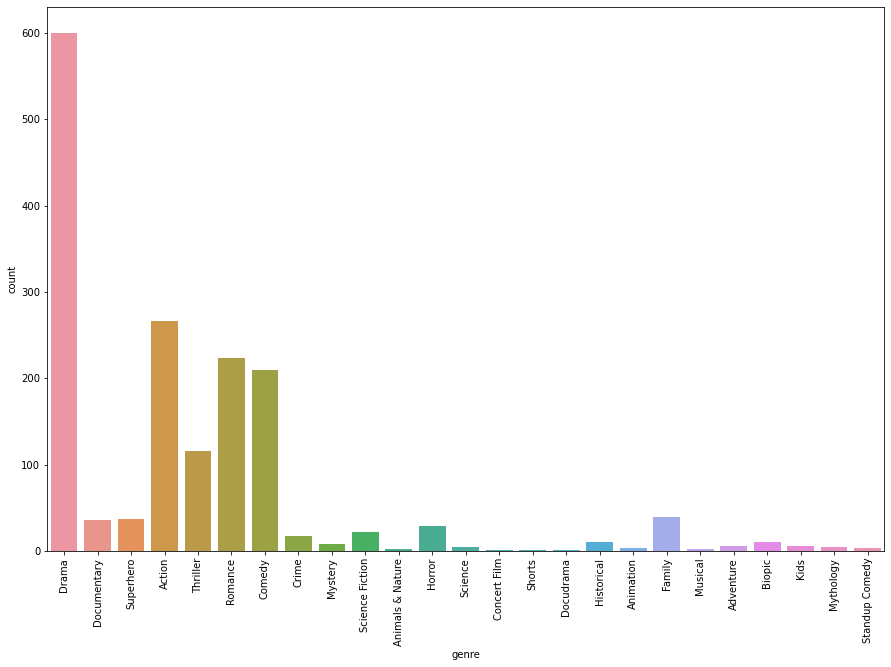

For age group of 13 there are total 1655 Movie listed on hotstar.

Top 5 Category are
 Drama       600
Action      266
Romance     224
Comedy      210
Thriller    116
Name: genre, dtype: int64


In [29]:
plt.figure(figsize=(15,10))
sns.countplot(age_13["genre"])
plt.xticks(rotation=90)
plt.show()

print("For age group of 13 there are total",age_13["genre"].count(),"Movie listed on hotstar.\n")
print("Top 5 Category are\n",age_13["genre"].value_counts().nlargest(5))

In [30]:
age_16=age.get_group(16)

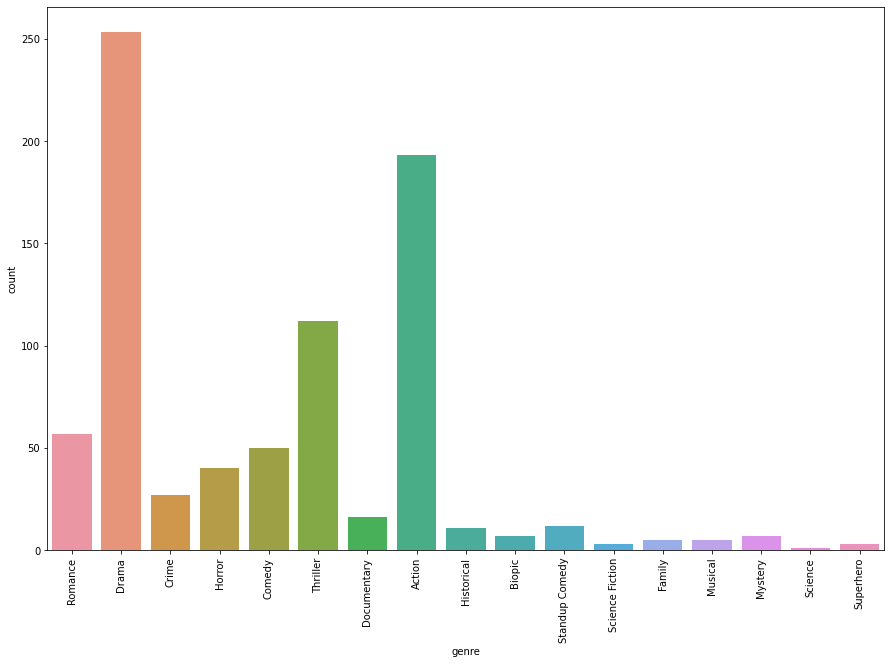

For age group of 16 there are total 802 Movie listed on hotstar.

Top 5 Category are
 Drama       253
Action      193
Thriller    112
Romance      57
Comedy       50
Name: genre, dtype: int64


In [31]:
plt.figure(figsize=(15,10))
sns.countplot(age_16["genre"])
plt.xticks(rotation=90)
plt.show()

print("For age group of 16 there are total",age_16["genre"].count(),"Movie listed on hotstar.\n")
print("Top 5 Category are\n",age_16["genre"].value_counts().nlargest(5))

In [32]:
age_18=age.get_group(18)

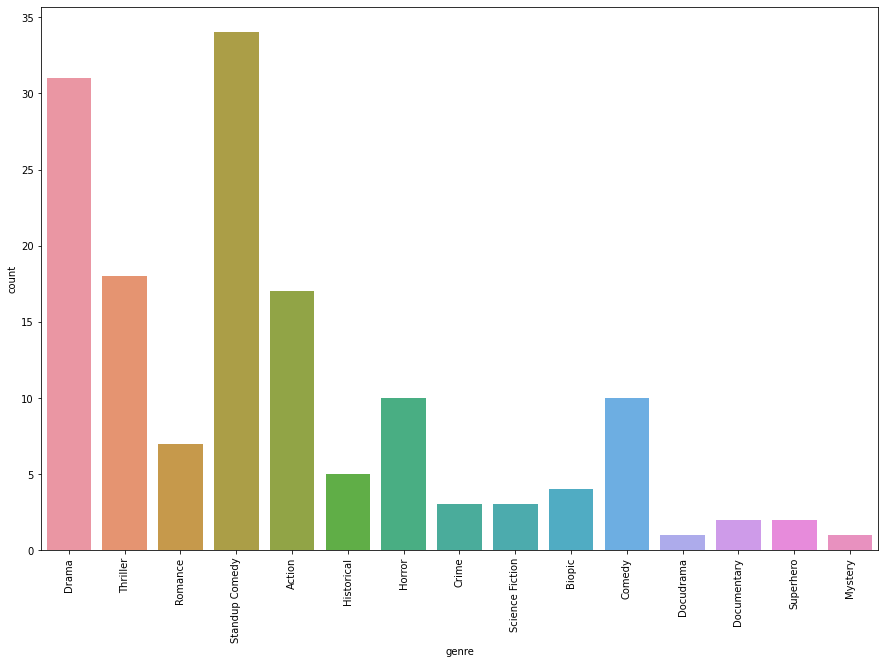

For age group of 18 there are total 148 Movie listed on hotstar.

Top 5 Category are
 Standup Comedy    34
Drama             31
Thriller          18
Action            17
Horror            10
Name: genre, dtype: int64


In [33]:
plt.figure(figsize=(15,10))
sns.countplot(age_18["genre"])
plt.xticks(rotation=90)
plt.show()

print("For age group of 18 there are total",age_18["genre"].count(),"Movie listed on hotstar.\n")
print("Top 5 Category are\n",age_18["genre"].value_counts().nlargest(5))

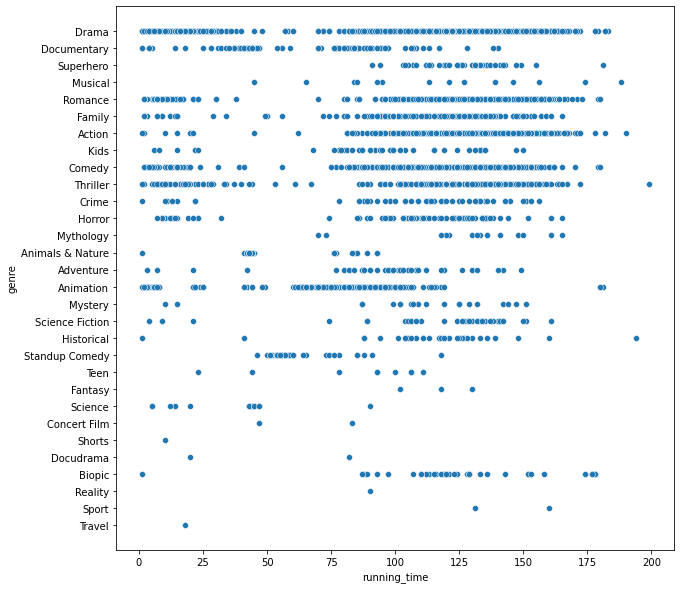

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="running_time",y="genre",data=movie_shows)
plt.show()

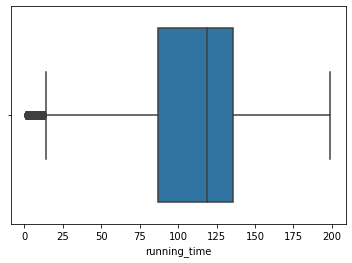

In [35]:
sns.boxplot(movie_shows["running_time"])
plt.show()

In [36]:
movie_shows["running_time"].describe()

count    4188.000000
mean      104.016476
std        45.989765
min         1.000000
25%        87.000000
50%       119.000000
75%       136.000000
max       199.000000
Name: running_time, dtype: float64

The Average Running time of all the movie which is listed on hotstar are 104.
The Value of Running time lies between 1 to 199.
The median value of Running time is 119.

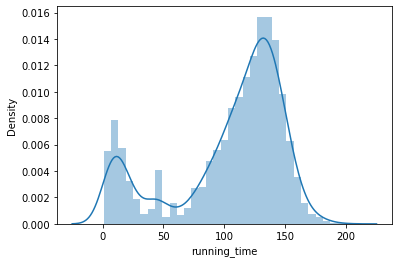

In [37]:
sns.distplot(movie_shows["running_time"])
plt.show()
#Most of the running time lies between 100 to 150.

In [38]:
age_group_4=age_4["genre"].value_counts()

In [39]:
age_group_7=age_7["genre"].value_counts()

In [40]:
age_group_13=age_13["genre"].value_counts()

In [41]:
age_group_16=age_16["genre"].value_counts()

In [42]:
age_group_18=age_18["genre"].value_counts()

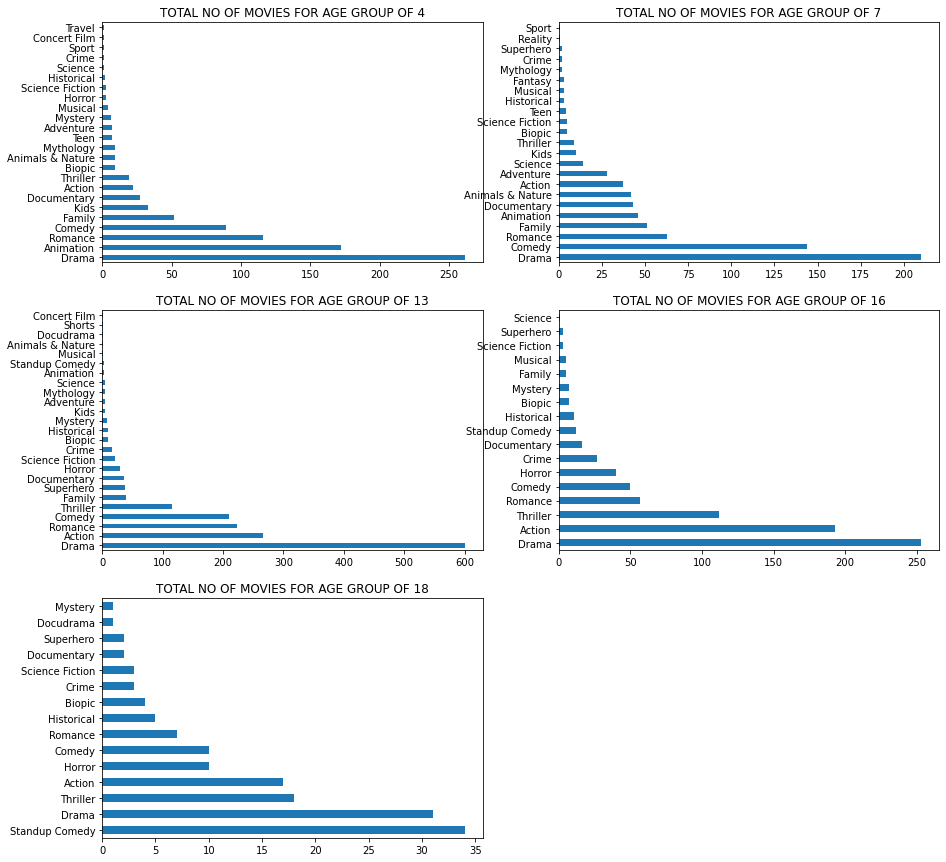

In [43]:
plt.subplot(3,2,1)
age_group_4.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF MOVIES FOR AGE GROUP OF 4")

plt.subplot(3,2,2)
age_group_7.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF MOVIES FOR AGE GROUP OF 7")

plt.subplot(3,2,3)
age_group_13.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF MOVIES FOR AGE GROUP OF 13")

plt.subplot(3,2,4)
age_group_16.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF MOVIES FOR AGE GROUP OF 16")

plt.subplot(3,2,5)
age_group_18.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF MOVIES FOR AGE GROUP OF 18")

plt.show()

# TV Show that are listed on hotstar

In [44]:
tv_shows=g.get_group("tv")

In [45]:
tv_shows
#There are total 2171 Tv shows listed on hotstar.

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
4188,9567,Ishqbaaz,"Brothers Shivaay, Omkara and Rudra share an un...",Family,2016,U/A 13+,NaN,13.0,758.0,tv
4189,1260068051,Aay Tobe Sohochori,"Homemaker Sohochori is loved by her family, bu...",Drama,2021,U/A 13+,NaN,1.0,302.0,tv
4190,5406,Mandal Bhari Aahe,"Mitra Mandals stand for unity, faith and celeb...",Reality,2015,U/A 7+,NaN,3.0,57.0,tv
4191,8205,Veep,Former Senator Selina Meyer finds that being V...,Comedy,2012,U/A 16+,NaN,7.0,65.0,tv
4192,1260004920,Road to Finals: VIVO IPL 2019,Recap of the road to finals for the 2 teams in...,Sport,2019,PG,NaN,1.0,2.0,tv
...,...,...,...,...,...,...,...,...,...,...
6354,18211,MS Dhoni - Reimagined Hindi,"MS Dhoni's career reimagined, watch streaming ...",Sport,2018,U/A 13+,NaN,1.0,1.0,tv
6355,1260063600,Sasneham,An old-age home reunites past lovers Indira an...,Drama,2021,U/A 13+,NaN,1.0,345.0,tv
6356,1260071152,Bolo Ambe Maa Ki Jai,"Narrated by Saptarishi, celebrate Navratri wit...",Mythology,2021,U/A 13+,NaN,1.0,5.0,tv
6357,1260002656,Ambi Ning Vaisaytho Specials,"Catch all the fun, gossips, and anecdotes from...",Reality,2018,G,NaN,1.0,1.0,tv


In [46]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 4188 to 6358
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    2171 non-null   int64  
 1   title         2171 non-null   object 
 2   description   2171 non-null   object 
 3   genre         2171 non-null   object 
 4   year          2171 non-null   int64  
 5   age_rating    2171 non-null   object 
 6   running_time  0 non-null      float64
 7   seasons       2171 non-null   float64
 8   episodes      2171 non-null   float64
 9   type          2171 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 186.6+ KB


In [47]:
tv_shows.isnull().sum()/len(tv_shows)*100

hotstar_id        0.0
title             0.0
description       0.0
genre             0.0
year              0.0
age_rating        0.0
running_time    100.0
seasons           0.0
episodes          0.0
type              0.0
dtype: float64

In [48]:
tv_shows.drop("running_time",axis=1,inplace=True)

In [49]:
tv_shows

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4188,9567,Ishqbaaz,"Brothers Shivaay, Omkara and Rudra share an un...",Family,2016,U/A 13+,13.0,758.0,tv
4189,1260068051,Aay Tobe Sohochori,"Homemaker Sohochori is loved by her family, bu...",Drama,2021,U/A 13+,1.0,302.0,tv
4190,5406,Mandal Bhari Aahe,"Mitra Mandals stand for unity, faith and celeb...",Reality,2015,U/A 7+,3.0,57.0,tv
4191,8205,Veep,Former Senator Selina Meyer finds that being V...,Comedy,2012,U/A 16+,7.0,65.0,tv
4192,1260004920,Road to Finals: VIVO IPL 2019,Recap of the road to finals for the 2 teams in...,Sport,2019,PG,1.0,2.0,tv
...,...,...,...,...,...,...,...,...,...
6354,18211,MS Dhoni - Reimagined Hindi,"MS Dhoni's career reimagined, watch streaming ...",Sport,2018,U/A 13+,1.0,1.0,tv
6355,1260063600,Sasneham,An old-age home reunites past lovers Indira an...,Drama,2021,U/A 13+,1.0,345.0,tv
6356,1260071152,Bolo Ambe Maa Ki Jai,"Narrated by Saptarishi, celebrate Navratri wit...",Mythology,2021,U/A 13+,1.0,5.0,tv
6357,1260002656,Ambi Ning Vaisaytho Specials,"Catch all the fun, gossips, and anecdotes from...",Reality,2018,G,1.0,1.0,tv


In [50]:
tv_shows["age_rating"].unique()

array(['U/A 13+', 'U/A 7+', 'U/A 16+', 'PG', 'U', 'G', 'A', '15+',
       'Kannada', 'English', '12+', 'Star Sports Kannada 1', 'Telugu',
       'Star Sports 1 Telugu', 'Marathi', 'Star Suvarna', 'Hindi',
       'Star Sports 1 Marathi', 'Star Vijay', 'Star Sports 2', 'Tamil',
       'Star Sports Hindi 1'], dtype=object)

# Removing those element which is not an age group

In [51]:
tv_shows[tv_shows["age_rating"]=="Hindi"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6055,1260008554,KBD Countdown 2019 Hindi,Your weekly review of VIVO Pro Kabaddi 2019,Sport,2019,Hindi,1.0,12.0,tv


In [52]:
tv_shows.drop(index=[6055],inplace=True)

In [53]:
tv_shows["age_rating"].value_counts()

U/A 13+                  943
U/A 7+                   317
PG                       252
U                        207
U/A 16+                  196
A                        123
G                         81
12+                       20
15+                        9
English                    6
Kannada                    4
Star Sports 1 Marathi      3
Star Sports Kannada 1      1
Telugu                     1
Star Sports 1 Telugu       1
Marathi                    1
Star Suvarna               1
Star Vijay                 1
Star Sports 2              1
Tamil                      1
Star Sports Hindi 1        1
Name: age_rating, dtype: int64

In [54]:
tv_shows[tv_shows["age_rating"]=="English"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4322,1260008648,KBD Juniors 2019 - Qualifiers,Match highlights of Kabaddi Junior,Sport,2019,English,1.0,34.0,tv
4511,1260008514,KBD Countdown 2019,Your weekly review of VIVO Pro Kabaddi 2019,Sport,2019,English,1.0,12.0,tv
5026,1260008556,Total KBD Raid On 2019,Your guide to VIVO Pro Kabaddi 2019,Sport,2019,English,1.0,67.0,tv
5200,10153,Best of ISL - Countdown,Check out the best goals and saves from the In...,Sport,2017,English,1.0,2.0,tv
5600,1260008661,Ultimate Table Tennis 2019 Highlights,Follow up on the high points of Ultimate Table...,Sport,2019,English,1.0,18.0,tv
5807,5217,Let’s Football,Let’s Football,Football,2015,English,1.0,12.0,tv


In [55]:
tv_shows.drop(index=[4322,4511,5026,5200,5600,5807],inplace=True)

In [56]:
tv_shows[tv_shows["age_rating"]=="Kannada"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4319,1260008351,Bengaluru Bulls Payana 2019 Kannada,Relive the VIVO PKL Journey of Bengaluru Bulls,Sport,2019,Kannada,1.0,1.0,tv
4396,1260008349,Bengaluru Bulls Champions 2019 Kannada,Relive the season 6 VIVO PKL campaign of the B...,Sport,2019,Kannada,1.0,1.0,tv
5643,1260008345,Bengaluru Bulls Hero - Pawan Sehrawat,Hero buildup for Pawan Sehrawat who gears up f...,Sport,2019,Kannada,1.0,1.0,tv
5670,10175,Connexion,Connexion is a Kannada reality show on Suvarna...,Reality,2016,Kannada,1.0,21.0,tv


In [57]:
tv_shows.drop(index=[4319,4396,5643,5670],inplace=True)

In [58]:
tv_shows[tv_shows["age_rating"]=="Tamil"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6262,11155,Amma,Amma is a Tamil drama on Star Vijay. The story...,Drama,2017,Tamil,1.0,20.0,tv


In [59]:
tv_shows.drop(index=[6262],inplace=True)

In [60]:
tv_shows[tv_shows["age_rating"]=="Marathi"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
5566,1260008423,KBD Raid On,Your guide to U Mumba and Puneri Paltan,Sport,2019,Marathi,1.0,5.0,tv


In [61]:
tv_shows.drop(index=[5566],inplace=True)

In [62]:
tv_shows[tv_shows["age_rating"]=="Telugu"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4987,1260008286,Titans Thunders 2019 Telugu,Telugu Titans gear up to make a splash in PKL ...,Sport,2019,Telugu,1.0,2.0,tv


In [63]:
tv_shows.drop(index=[4987],inplace=True)

In [64]:
tv_shows[tv_shows["age_rating"]=="Star Sports 1 Marathi"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6177,1260008506,KBD Countdown,Your weekly review of VIVO Pro Kabaddi 2019,Sport,2019,Star Sports 1 Marathi,1.0,12.0,tv
6189,1260008508,KBD Juniors - Qualifiers,Match highlights of Kabaddi Junior,Sport,2019,Star Sports 1 Marathi,1.0,32.0,tv
6310,1260008512,Marathitla Nava Star,Find out about the culture of sports in Mahara...,Sport,2019,Star Sports 1 Marathi,1.0,1.0,tv


In [65]:
tv_shows.drop(index=[6177,6189,6310],inplace=True)

In [66]:
tv_shows[tv_shows["age_rating"]=="Star Sports Kannada 1"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4871,1260008354,Bengaluru Bulls Hero - Rohit Kumar,Hero buildup to Rohit Kumar who prepares for V...,Sport,2019,Star Sports Kannada 1,1.0,1.0,tv


In [67]:
tv_shows.drop(index=[4871],inplace=True)

In [68]:
tv_shows[tv_shows["age_rating"]=="Star Sports 1 Telugu"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
5480,1260008292,PKL Journey 2019 Telugu,Here's a recap of the seasons gone by in VIVO ...,Sport,2019,Star Sports 1 Telugu,1.0,5.0,tv


In [69]:
tv_shows.drop(index=[5480],inplace=True)

In [70]:
tv_shows[tv_shows["age_rating"]=="Star Suvarna"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
5607,7222,Amma,"Sukanya has two daughters, Anusha and Shalini,...",Drama,2016,Star Suvarna,10.0,313.0,tv


In [71]:
tv_shows.drop(index=[5607],inplace=True)

In [72]:
tv_shows[tv_shows["age_rating"]=="Star Vijay"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6200,1260002739,Neelakuyil,Tribal girl Chittu is forced to marry journali...,Drama,2018,Star Vijay,1.0,211.0,tv


In [73]:
tv_shows.drop(index=[6200],inplace=True)

In [74]:
tv_shows[tv_shows["age_rating"]=="Star Sports 2"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6223,1260008646,KBD Juniors 2019 - Finals,Match highlights of Kabaddi Juniors,Sport,2019,Star Sports 2,1.0,11.0,tv


In [75]:
tv_shows.drop(index=[6223],inplace=True)

In [76]:
tv_shows[tv_shows["age_rating"]=="Star Sports Hindi 1"]

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
6347,1260008558,Total KBD Raid On 2019 Hindi,Your guide to VIVO Pro Kabaddi 2019,Sport,2019,Star Sports Hindi 1,1.0,67.0,tv


In [77]:
tv_shows.drop(index=[6347],inplace=True)

In [78]:
tv_shows["age_rating"].unique()

array(['U/A 13+', 'U/A 7+', 'U/A 16+', 'PG', 'U', 'G', 'A', '15+', '12+'],
      dtype=object)

In [79]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("+","")

In [80]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("U/A","")

In [81]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("PG","14")

In [82]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("A","18")

In [83]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("G","4")

In [84]:
tv_shows["age_rating"]=tv_shows["age_rating"].str.replace("U","4")

In [85]:
tv_shows["age_rating"]=tv_shows["age_rating"].astype("int")

In [86]:
tv_shows

,hotstar_id,title,description,genre,year,age_rating,seasons,episodes,type
4188,9567,Ishqbaaz,"Brothers Shivaay, Omkara and Rudra share an un...",Family,2016,13,13.0,758.0,tv
4189,1260068051,Aay Tobe Sohochori,"Homemaker Sohochori is loved by her family, bu...",Drama,2021,13,1.0,302.0,tv
4190,5406,Mandal Bhari Aahe,"Mitra Mandals stand for unity, faith and celeb...",Reality,2015,7,3.0,57.0,tv
4191,8205,Veep,Former Senator Selina Meyer finds that being V...,Comedy,2012,16,7.0,65.0,tv
4192,1260004920,Road to Finals: VIVO IPL 2019,Recap of the road to finals for the 2 teams in...,Sport,2019,14,1.0,2.0,tv
...,...,...,...,...,...,...,...,...,...
6354,18211,MS Dhoni - Reimagined Hindi,"MS Dhoni's career reimagined, watch streaming ...",Sport,2018,13,1.0,1.0,tv
6355,1260063600,Sasneham,An old-age home reunites past lovers Indira an...,Drama,2021,13,1.0,345.0,tv
6356,1260071152,Bolo Ambe Maa Ki Jai,"Narrated by Saptarishi, celebrate Navratri wit...",Mythology,2021,13,1.0,5.0,tv
6357,1260002656,Ambi Ning Vaisaytho Specials,"Catch all the fun, gossips, and anecdotes from...",Reality,2018,4,1.0,1.0,tv


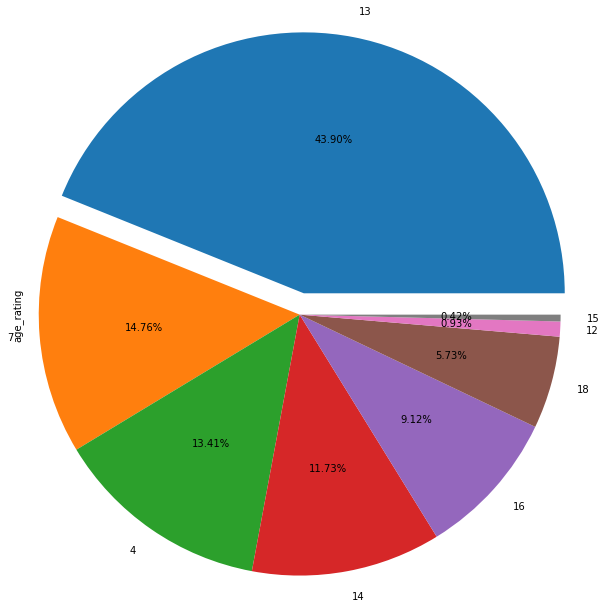

In [87]:
plt.figure(figsize=(10,10))
tv_shows["age_rating"].value_counts().plot.pie(autopct="%1.2f%%",explode=[0.1,0,0,0,0,0,0,0],radius=1.2)
plt.show()

In Hotstar Tv show Category the highest percent of tv shows are listed for the age group of 13 which is 43.90% 

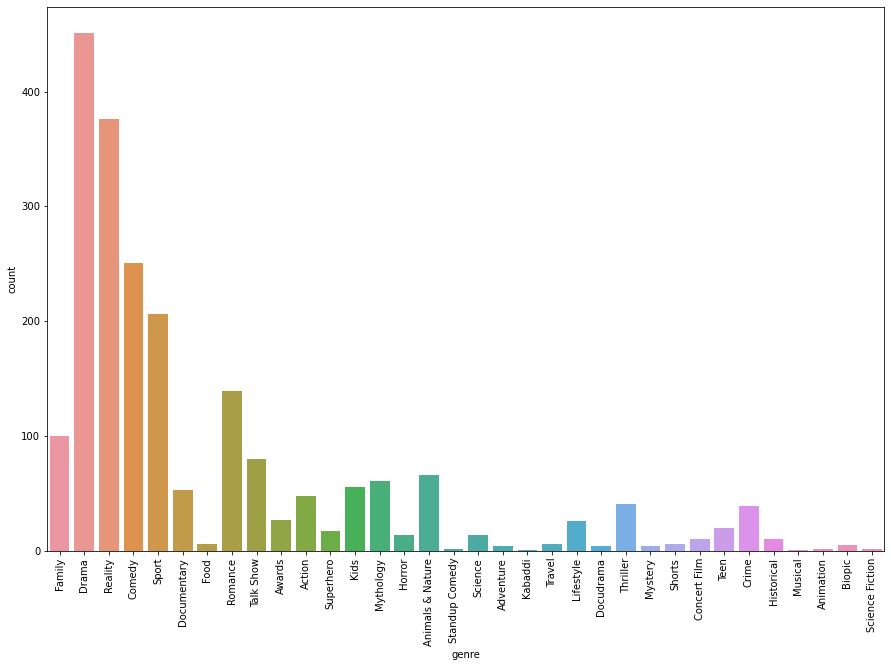

Top 5 Categories of Tv Shows which has been listed on hotstar:
 Drama      451
Reality    376
Comedy     251
Sport      206
Romance    139
Name: genre, dtype: int64


In [88]:
plt.figure(figsize=(15,10))
sns.countplot("genre",data=tv_shows)
plt.xticks(rotation=90)
plt.show()

print("Top 5 Categories of Tv Shows which has been listed on hotstar:\n",tv_shows.genre.value_counts().nlargest(5))

In [89]:
shows_per_seasons=tv_shows[["title","genre","seasons","episodes"]]

In [90]:
shows_per_seasons

,title,genre,seasons,episodes
4188,Ishqbaaz,Family,13.0,758.0
4189,Aay Tobe Sohochori,Drama,1.0,302.0
4190,Mandal Bhari Aahe,Reality,3.0,57.0
4191,Veep,Comedy,7.0,65.0
4192,Road to Finals: VIVO IPL 2019,Sport,1.0,2.0
...,...,...,...,...
6354,MS Dhoni - Reimagined Hindi,Sport,1.0,1.0
6355,Sasneham,Drama,1.0,345.0
6356,Bolo Ambe Maa Ki Jai,Mythology,1.0,5.0
6357,Ambi Ning Vaisaytho Specials,Reality,1.0,1.0


In [91]:
shows_per_seasons.sort_values(by=["seasons"])

,title,genre,seasons,episodes
5269,Guddi,Drama,1.0,136.0
5482,Comedy Stars Plus,Comedy,1.0,26.0
5481,Ultimate Supercar,Science,1.0,6.0
5479,Fish Hooks,Comedy,1.0,21.0
5477,Spider-Man Unlimited,Kids,1.0,13.0
...,...,...,...,...
4293,Amruthavarshini - 2012,Romance,43.0,1724.0
5372,Pudhcha Paaul,Family,45.0,1944.0
4720,Lakshya,Crime,53.0,1226.0
5373,Yeh Rishta Kya Kehlata Hai,Drama,67.0,3792.0


In [92]:
# In Hotstar Tv Show Category the highest no of season is 73 which is having 2354 episodes which comes under crime genre.

In [93]:
shows_per_episodes=tv_shows[["title","genre","seasons","episodes"]]

In [94]:
shows_per_episodes

,title,genre,seasons,episodes
4188,Ishqbaaz,Family,13.0,758.0
4189,Aay Tobe Sohochori,Drama,1.0,302.0
4190,Mandal Bhari Aahe,Reality,3.0,57.0
4191,Veep,Comedy,7.0,65.0
4192,Road to Finals: VIVO IPL 2019,Sport,1.0,2.0
...,...,...,...,...
6354,MS Dhoni - Reimagined Hindi,Sport,1.0,1.0
6355,Sasneham,Drama,1.0,345.0
6356,Bolo Ambe Maa Ki Jai,Mythology,1.0,5.0
6357,Ambi Ning Vaisaytho Specials,Reality,1.0,1.0


In [95]:
shows_per_episodes.sort_values(by=["episodes"])

,title,genre,seasons,episodes
4713,Suvarna Mahotsava,Reality,1.0,1.0
5551,90s Kids Vs 2K Kids,Reality,1.0,1.0
6195,Unda - The Success Story,Talk Show,1.0,1.0
4693,Montage Kallayi FM Specials,Reality,1.0,1.0
4684,Star Jodigal,Reality,1.0,1.0
...,...,...,...,...
5490,Yeh Hai Mohabbatein,Romance,43.0,1895.0
5372,Pudhcha Paaul,Family,45.0,1944.0
4746,Savdhaan India,Crime,73.0,2354.0
6291,Saath Nibhaana Saathiya 2,Family,3.0,2732.0


In [96]:
# In Hotstar Tv Show Category the highest no of Episodes is 3792 which is having 67 seasons which comes under Drama genre.

# Tv shows Age wise

In [97]:
tv_shows["age_rating"].unique()

array([13,  7, 16, 14,  4, 18, 15, 12])

In [98]:
tv=tv_shows.groupby("age_rating")

In [99]:
tv_age_4=tv.get_group(4)

In [100]:
tv_age_7=tv.get_group(7)

In [101]:
tv_age_12=tv.get_group(12)

In [102]:
tv_age_13=tv.get_group(13)

In [103]:
tv_age_14=tv.get_group(14)

In [104]:
tv_age_15=tv.get_group(15)

In [105]:
tv_age_16=tv.get_group(16)

In [106]:
tv_age_18=tv.get_group(18)

In [120]:
tv_age_group_4=tv_age_4["genre"].value_counts()

In [121]:
tv_age_group_7=tv_age_7["genre"].value_counts()

In [122]:
tv_age_group_12=tv_age_12["genre"].value_counts()

In [123]:
tv_age_group_13=tv_age_13["genre"].value_counts()

In [124]:
tv_age_group_14=tv_age_14["genre"].value_counts()

In [125]:
tv_age_group_15=tv_age_15["genre"].value_counts()

In [126]:
tv_age_group_16=tv_age_16["genre"].value_counts()

In [127]:
tv_age_group_18=tv_age_18["genre"].value_counts()

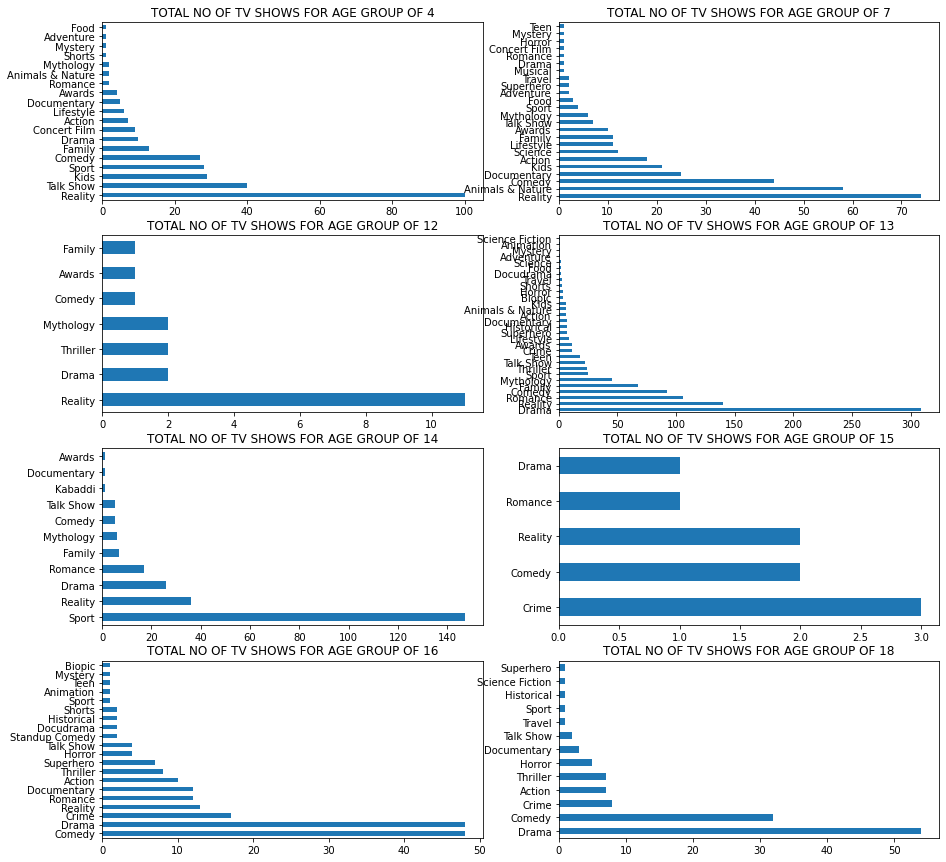

In [129]:
plt.subplot(4,2,1)
tv_age_group_4.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 4")

plt.subplot(4,2,2)
tv_age_group_7.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 7")

plt.subplot(4,2,3)
tv_age_group_12.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 12")

plt.subplot(4,2,4)
tv_age_group_13.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 13")

plt.subplot(4,2,5)
tv_age_group_14.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 14")

plt.subplot(4,2,6)
tv_age_group_15.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 15")

plt.subplot(4,2,7)
tv_age_group_16.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 16")

plt.subplot(4,2,8)
tv_age_group_18.plot.barh(figsize=(15,15))
plt.title("TOTAL NO OF TV SHOWS FOR AGE GROUP OF 18")

plt.show()